In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


import platform
from matplotlib import font_manager, rc

In [116]:
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [117]:
data = pd.read_csv("../data/전처리 완료/기아_해외공장판매실적_전처리.CSV", encoding="utf-8")

In [118]:
data.isna().sum()

공장명(국가)    0
공장 코드      0
차종         0
1월         0
2월         0
3월         0
4월         0
5월         0
6월         0
7월         0
8월         0
9월         0
10월        0
11월        0
12월        0
연도         0
dtype: int64

In [119]:
data

,공장명(국가),공장 코드,차종,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연도
0,US Plant,KaGA,Optima / K5,5701,6150,6635,5652,6396.0,5050.0,4771.0,6853.0,6150.0,6550.0,5900.0,3445.0,2023
1,US Plant,KaGA,Sportage,6400,7950,9129,7358,8424.0,6142.0,5900.0,8450.0,7350.0,8150.0,7600.0,6150.0,2023
2,US Plant,KaGA,Sorento,6795,5330,5385,6184,7368.0,6416.0,5513.0,7491.0,6602.0,7097.0,6100.0,4825.0,2023
3,US Plant,KaGA,Telluride,9704,10400,11851,10206,11212.0,8792.0,8216.0,12313.0,10698.0,11903.0,10300.0,7850.0,2023
4,China Plant,DYK,Pegas,3320,3436,3504,3465,3710.0,3548.0,3572.0,5866.0,7042.0,4121.0,5645.0,4495.0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,India Plant,KIN,Syros,"5,546",0,0,0,0,0,0,0,0,0,0,0,2025
81,India Plant,KIN,Sonet,"8,259",0,0,0,0,0,0,0,0,0,0,0,2025
82,India Plant,KIN,Seltos,"6,584",0,0,0,0,0,0,0,0,0,0,0,2025
83,India Plant,KIN,Carens MPV,"5,797",0,0,0,0,0,0,0,0,0,0,0,2025


In [120]:
monthly_columns = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

In [121]:
data[monthly_columns] = data[monthly_columns].replace({',': ''}, regex=True).apply(pd.to_numeric, errors='coerce')

In [122]:
# 연도별 월별 총 판매량 계산
data_grouped = data.groupby('연도')[monthly_columns].sum()

In [123]:
data_grouped = data_grouped.loc[~(data_grouped.sum(axis=1) == 0)]

In [124]:
fig, axes = plt.subplots(nrows=len(data_grouped), ncols=1, figsize=(12, 6 * len(data_grouped)), sharex=True)

In [125]:
if len(data_grouped) == 1:
    axes = [axes]

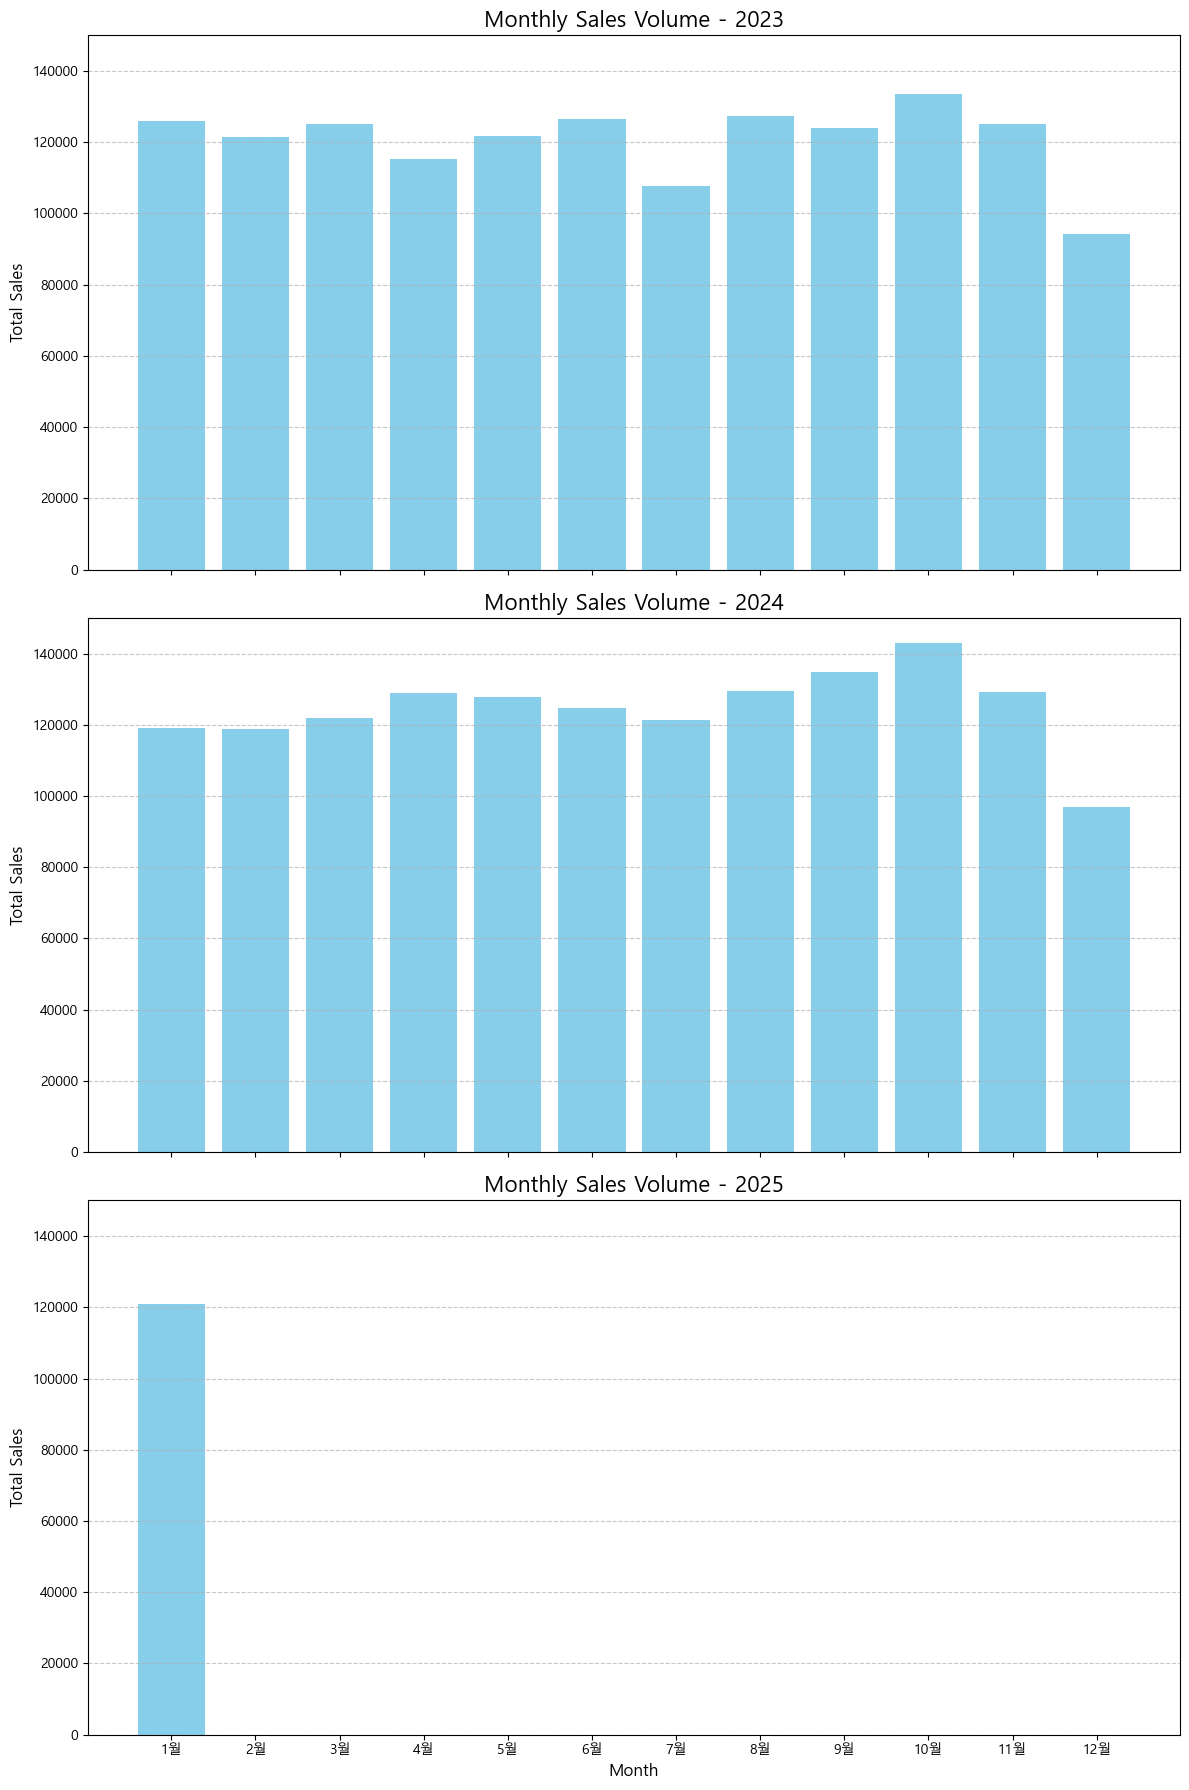

In [126]:
for i, (year, monthly_data) in enumerate(data_grouped.iterrows()):
    axes[i].bar(monthly_columns, monthly_data, color='skyblue')  # 월별 데이터 시각화
    axes[i].set_title(f'Monthly Sales Volume - {year}', fontsize=16)
    axes[i].set_ylabel('Total Sales', fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Y축 범위를 설정 (0 ~ 최대값 + 약간의 여유)
    axes[i].set_ylim(0, 150000)

    # 마지막 차트에만 X축 레이블 추가
    if i == len(data_grouped) - 1:
        axes[i].set_xlabel('Month', fontsize=12)

plt.tight_layout()
plt.show()

In [127]:
# 계절별 판매량 현황 차트
seasons = {
    'Spring': ['3월', '4월', '5월'],
    'Summer': ['6월', '7월', '8월'],
    'Autumn': ['9월', '10월', '11월'],
    'Winter': ['12월', '1월', '2월']
}

In [128]:
seasonal_sales = {}

In [129]:
for year, monthly_data in data_grouped.iterrows():
    seasonal_sales[year] = {season: monthly_data[seasons[season]].sum() for season in seasons}


In [130]:
fig, axes = plt.subplots(nrows=len(data_grouped), ncols=1, figsize=(10, 6 * len(data_grouped)), sharex=True)

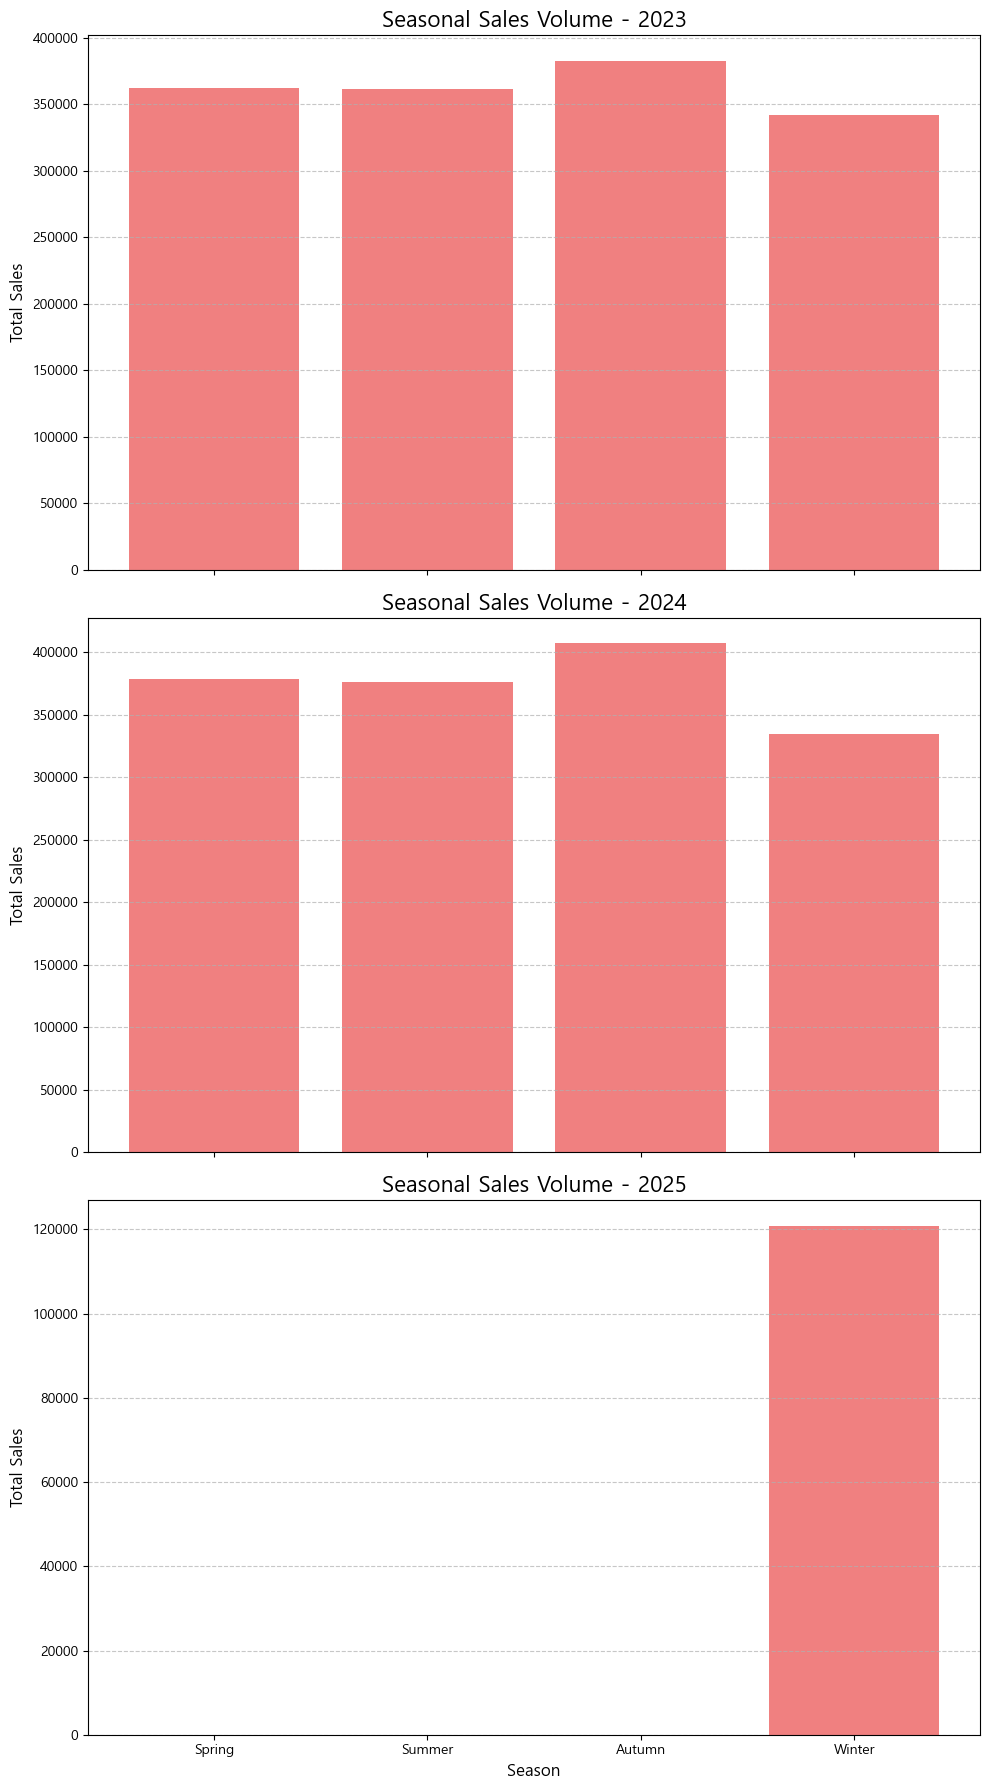

In [131]:
for i, (year, sales) in enumerate(seasonal_sales.items()):
    axes[i].bar(sales.keys(), sales.values(), color='lightcoral')
    axes[i].set_title(f'Seasonal Sales Volume - {year}', fontsize=16)
    axes[i].set_ylabel('Total Sales', fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    if i == len(data_grouped) - 1:
        axes[i].set_xlabel('Season', fontsize=12)
plt.tight_layout()
plt.show()

In [132]:
# 분기별 판매량 현황 차트
quarters = {
    'Q1': ['1월', '2월', '3월'],
    'Q2': ['4월', '5월', '6월'],
    'Q3': ['7월', '8월', '9월'],
    'Q4': ['10월', '11월', '12월']
}

In [133]:
quarterly_sales = {}
for year, monthly_data in data_grouped.iterrows():
    quarterly_sales[year] = {quarter: monthly_data[quarters[quarter]].sum() for quarter in quarters}

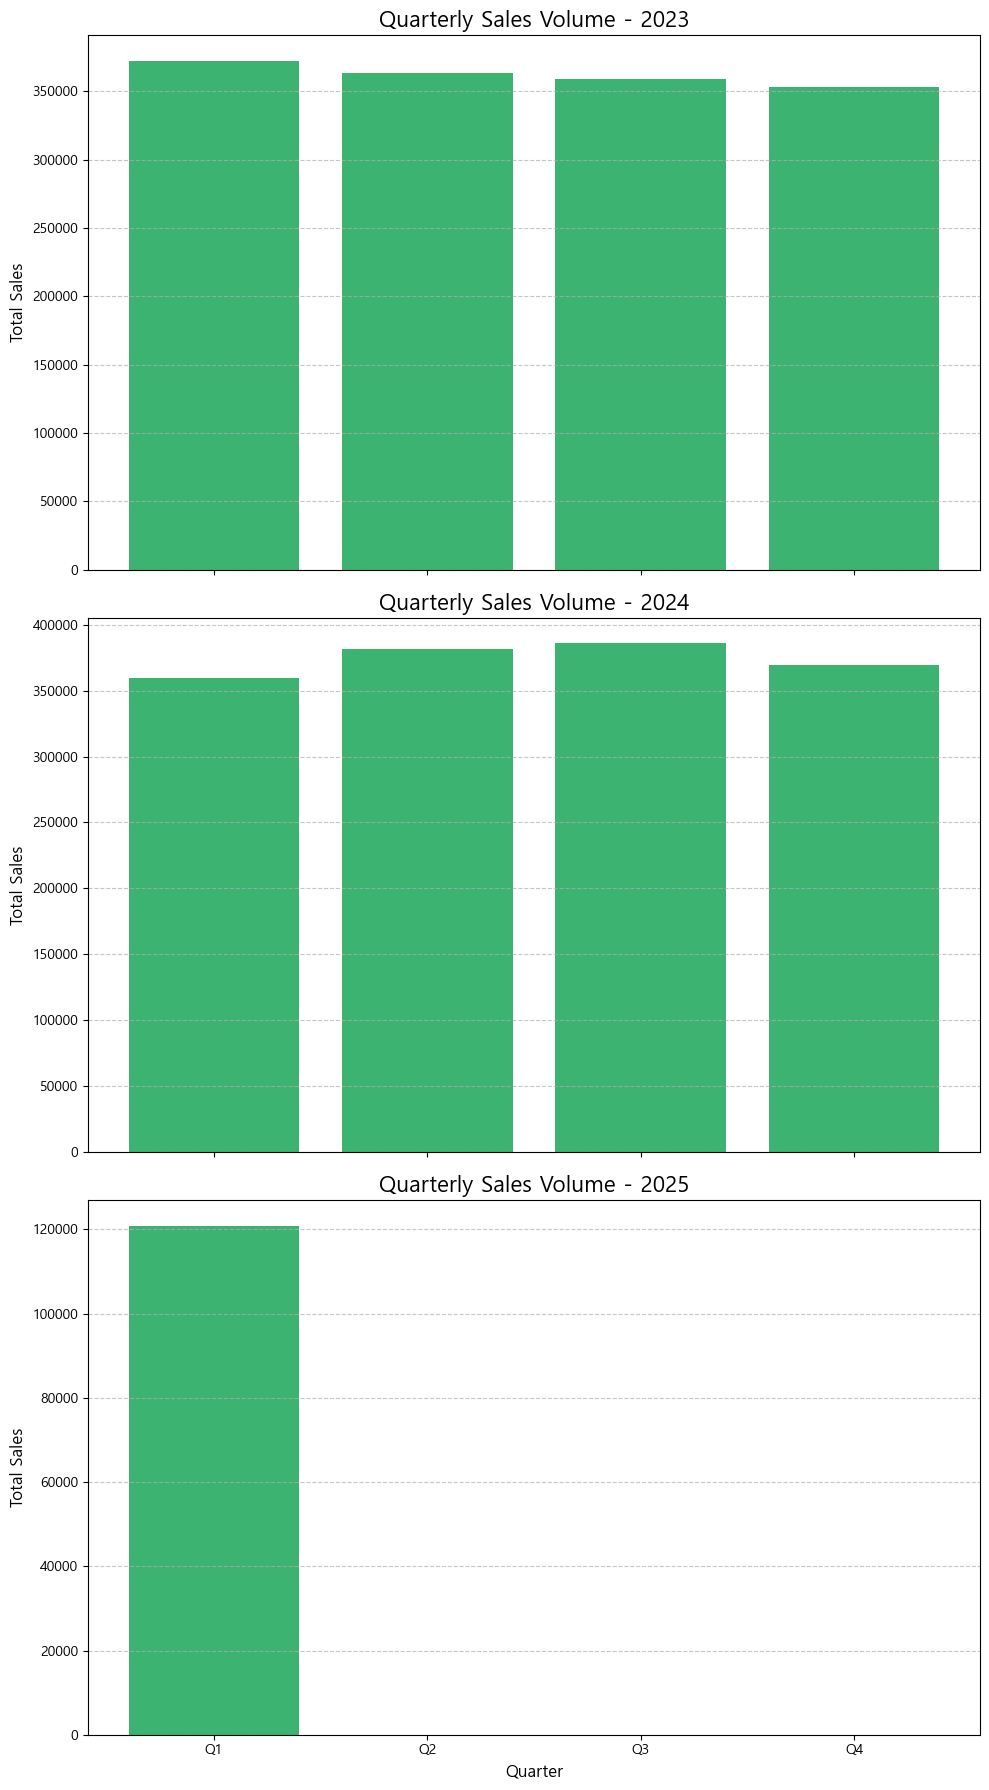

In [134]:
fig, axes = plt.subplots(nrows=len(data_grouped), ncols=1, figsize=(10, 6 * len(data_grouped)), sharex=True)
for i, (year, sales) in enumerate(quarterly_sales.items()):
    axes[i].bar(sales.keys(), sales.values(), color='mediumseagreen')
    axes[i].set_title(f'Quarterly Sales Volume - {year}', fontsize=16)
    axes[i].set_ylabel('Total Sales', fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    if i == len(data_grouped) - 1:
        axes[i].set_xlabel('Quarter', fontsize=12)
plt.tight_layout()
plt.show()

In [135]:
monthly_columns = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

In [136]:
data[monthly_columns] = data[monthly_columns].replace({',': ''}, regex=True).apply(pd.to_numeric, errors='coerce')

In [137]:
# 차종별 총 판매량 계산
data['Total Sales'] = data[monthly_columns].sum(axis=1)


In [138]:
# 차종별 판매량 그룹화
car_model_sales = data.groupby('차종')['Total Sales'].sum().reset_index()

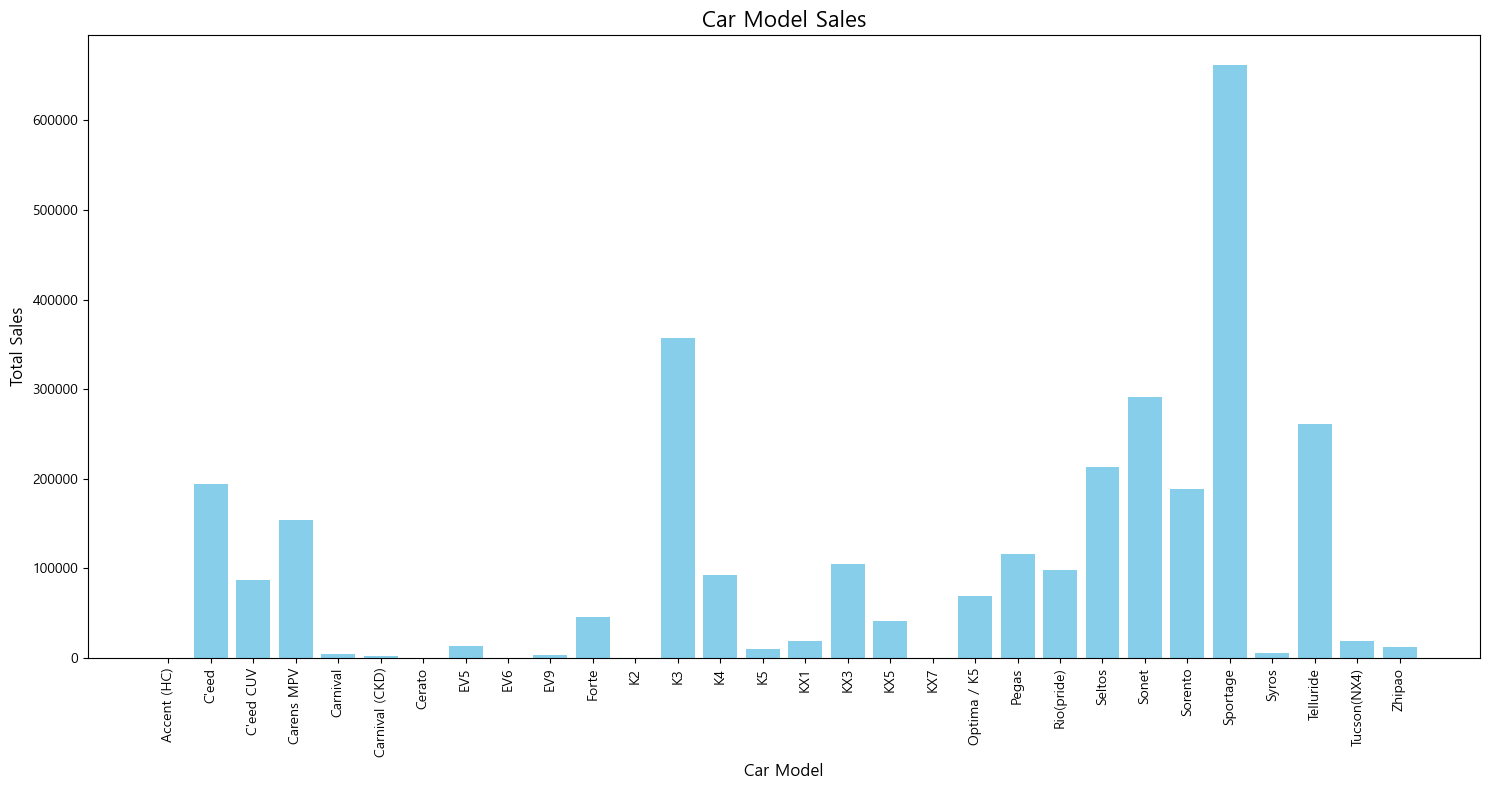

In [139]:
# 차트 생성
plt.figure(figsize=(15, 8))
plt.bar(car_model_sales['차종'], car_model_sales['Total Sales'], color='skyblue')
plt.title('Car Model Sales', fontsize=16)
plt.xlabel('Car Model', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=90)  # X축 레이블 회전
plt.tight_layout()
plt.show()

In [140]:
# 계절별 판매량 계산
seasonal_sales = {}
for season, months in seasons.items():
    seasonal_sales[season] = data[['차종'] + months].copy()
    seasonal_sales[season]['Total Sales'] = seasonal_sales[season][months].sum(axis=1)

In [141]:
best_selling_models = {}
for season in seasons:
    best_selling_model = seasonal_sales[season].groupby('차종')['Total Sales'].sum().sort_values(ascending=False).index[0]
    best_selling_models[season] = best_selling_model

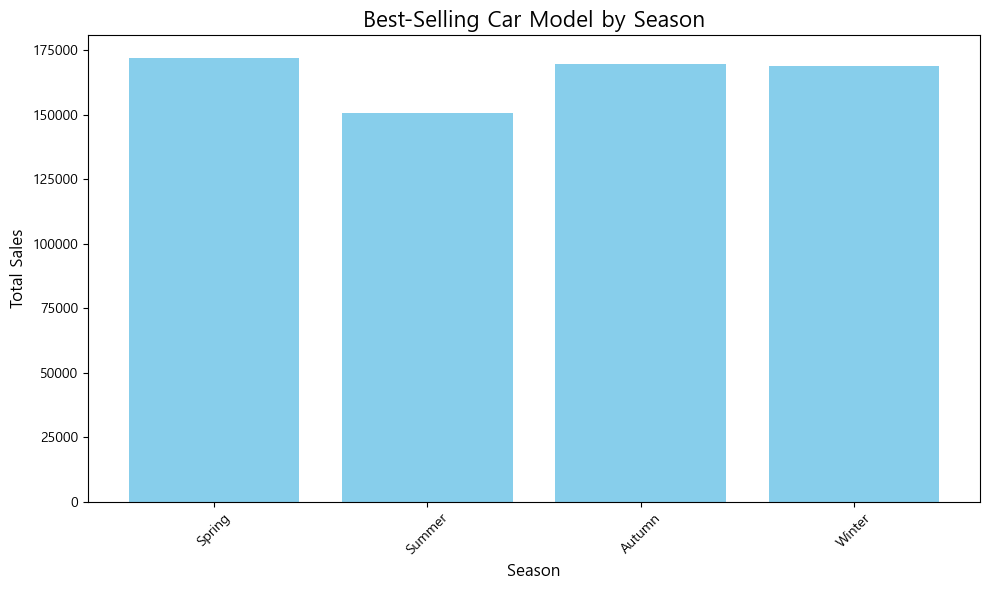

In [142]:
# 차트 생성
plt.figure(figsize=(10, 6))
plt.bar(best_selling_models.keys(), [seasonal_sales[season].groupby('차종')['Total Sales'].sum().max() for season in seasons], color='skyblue')
plt.title('Best-Selling Car Model by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)  # X축 레이블 회전
plt.tight_layout()
plt.show()


In [143]:
# 각 계절의 최다 판매 차종 표시
for season, model in best_selling_models.items():
    print(f"{season}: {model}")

Spring: Sportage
Summer: Sportage
Autumn: Sportage
Winter: Sportage


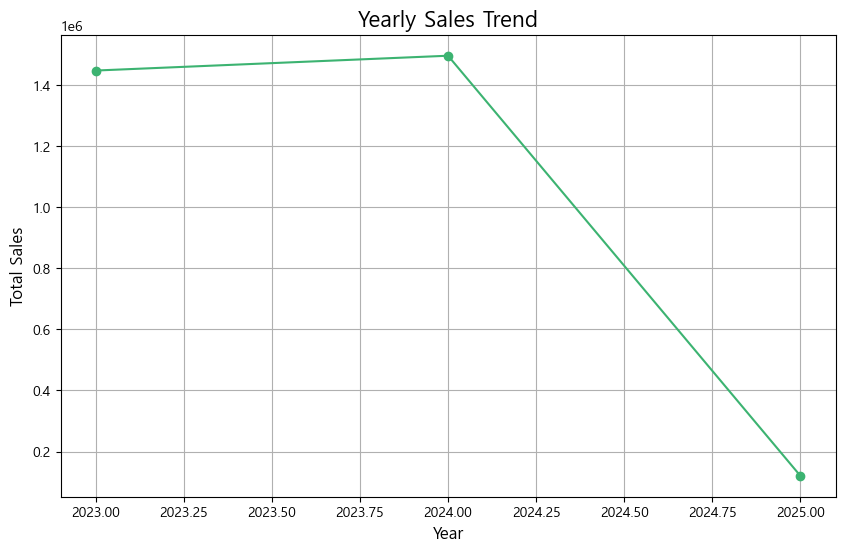

In [144]:
# 연도별 판매량 분석
yearly_sales = data.groupby('연도')[monthly_columns].sum().sum(axis=1)
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', color='mediumseagreen')
plt.title('Yearly Sales Trend', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True)
plt.show()

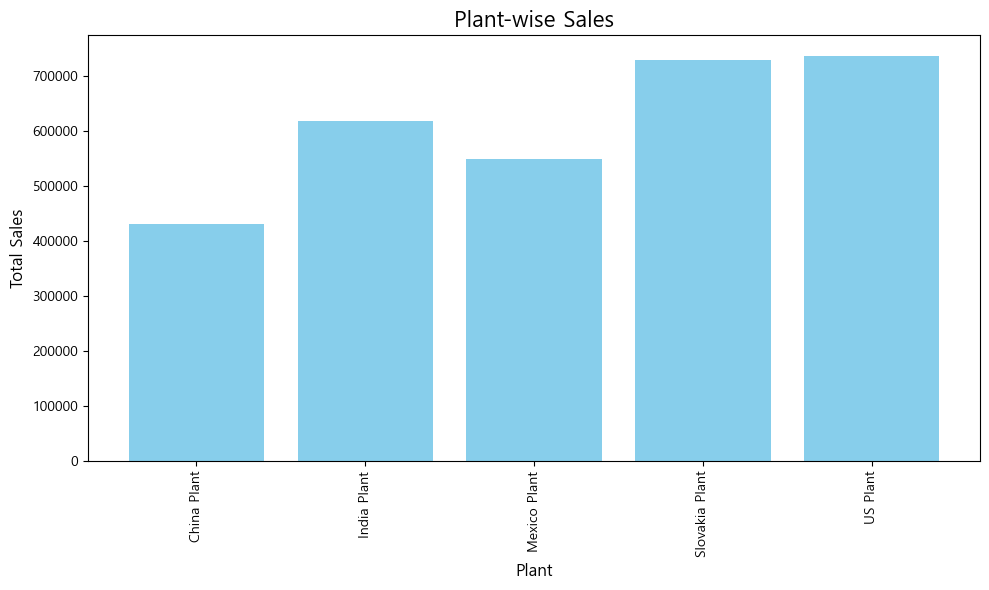

In [145]:
# 공장별 판매량 분석
plant_sales = data.groupby('공장명(국가)')[monthly_columns].sum().sum(axis=1)
plt.figure(figsize=(10, 6))
plt.bar(plant_sales.index, plant_sales.values, color='skyblue')
plt.title('Plant-wise Sales', fontsize=16)
plt.xlabel('Plant', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=90)  # X축 레이블 회전
plt.tight_layout()
plt.show()

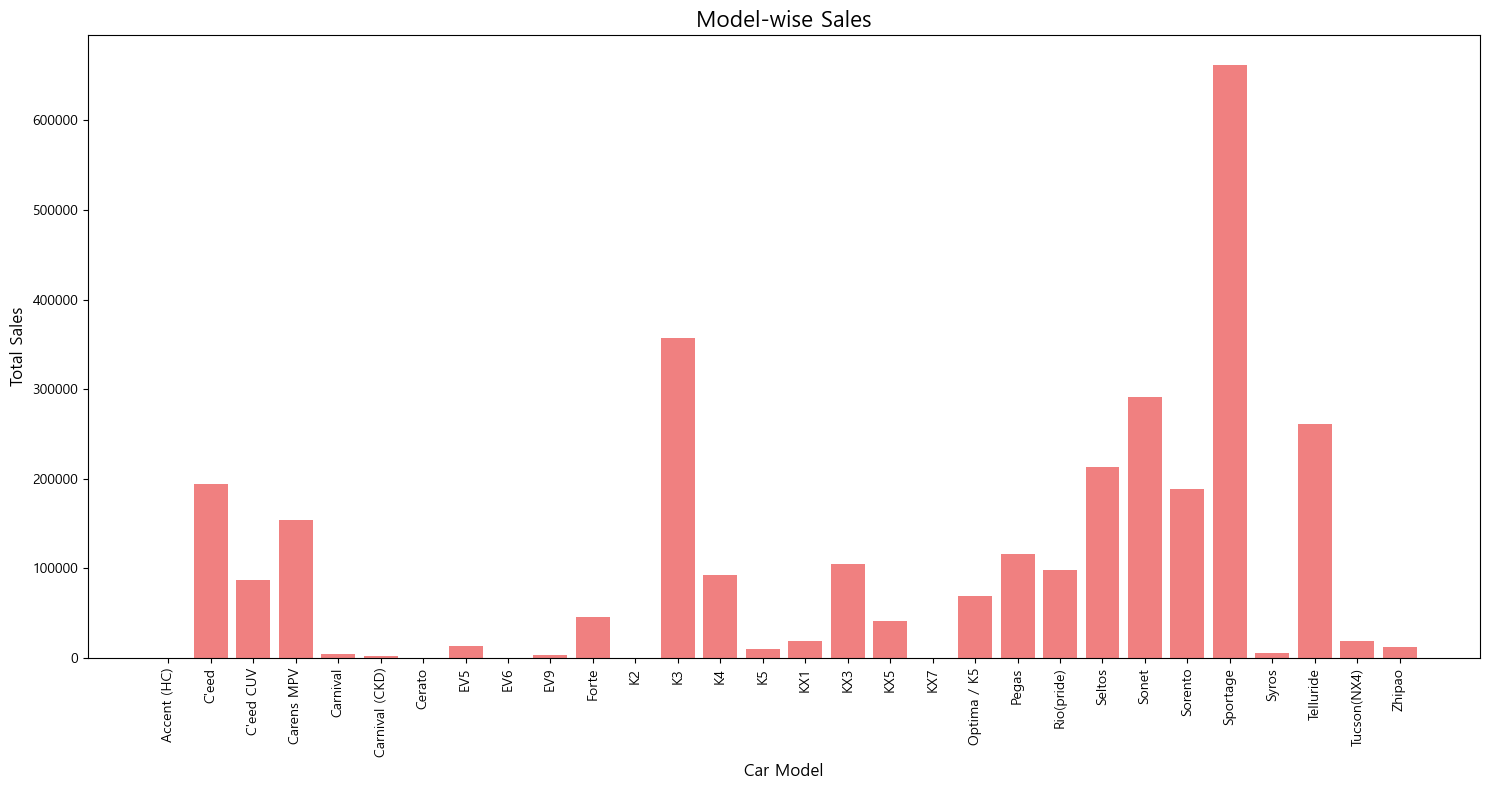

차종
Accent (HC)        0.000000
C'eed              6.318965
C'eed CUV          2.849093
Carens MPV         5.041024
Carnival           0.155872
Carnival (CKD)     0.054655
Cerato             0.000000
EV5                0.442589
EV6                0.003361
EV9                0.092375
Forte              1.475253
K2                 0.000000
K3                11.668437
K4                 3.024183
K5                 0.333084
KX1                0.607532
KX3                3.438254
KX5                1.362941
KX7                0.000000
Optima / K5        2.259703
Pegas              3.780833
Rio(pride)         3.198654
Seltos             6.942224
Sonet              9.496018
Sorento            6.169325
Sportage          21.592230
Syros              0.180964
Telluride          8.521990
Tucson(NX4)        0.603323
Zhipao             0.387118
dtype: float64


In [146]:
# 차종별 판매량 분석
model_sales = data.groupby('차종')[monthly_columns].sum().sum(axis=1)
plt.figure(figsize=(15, 8))
plt.bar(model_sales.index, model_sales.values, color='lightcoral')
plt.title('Model-wise Sales', fontsize=16)
plt.xlabel('Car Model', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=90)  # X축 레이블 회전
plt.tight_layout()
plt.show()

# 시장 점유율 계산
market_share = model_sales / model_sales.sum() * 100
print(market_share)

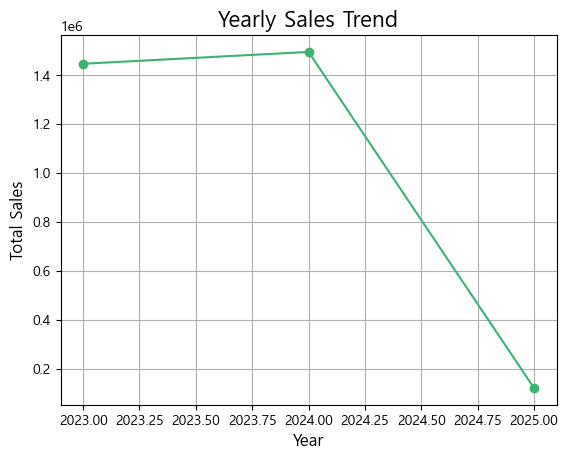

In [147]:
yearly_sales = data_grouped.sum(axis=1)
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', color='mediumseagreen')
plt.title('Yearly Sales Trend', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True)
plt.show()

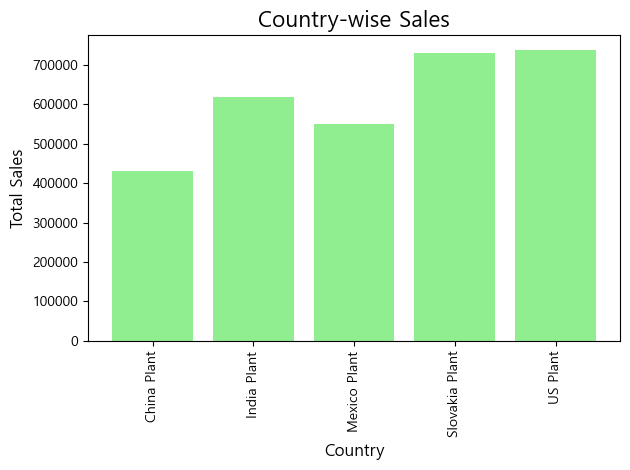

In [148]:
country_sales = data.groupby('공장명(국가)')[monthly_columns].sum().sum(axis=1).reset_index()
plt.bar(country_sales['공장명(국가)'], country_sales.iloc[:, 1], color='lightgreen')
plt.title('Country-wise Sales', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [197]:
df_new = pd.read_csv("../data/전처리 완료/기아_해외현지판매_전처리.CSV", encoding="utf-8")

In [198]:
df_new.loc[df_new["연도"] == 2023,]

,국가명,공장명(국가),차종,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연도
0,Africa,Special Vehicle,Bongo,0.0,2.0,2.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2023
3,Africa,Special Vehicle,Bongo (CKD),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023
8,Africa,CKD (excl. Russia),Bongo / Frontier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023
11,Africa,Korean Plant,Bongo / Frontier,185.0,295.0,289.0,185.0,274.0,160.0,190.0,178.0,213.0,167.0,151.0,144.0,2023
16,Africa,Korean Plant,Bus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,U.S.A,Korean Plant,Stinger,466.0,622.0,958.0,963.0,903.0,642.0,464.0,237.0,117.0,49.0,20.0,11.0,2023
2669,U.S.A,CKD (excl. Russia),Stonic,134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023
2672,U.S.A,Korean Plant,Stonic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023
2678,U.S.A,US Plant,Telluride,7582.0,9023.0,10585.0,8555.0,10005.0,9534.0,9759.0,9791.0,9147.0,8533.0,8810.0,9441.0,2023


In [199]:
df_new.loc[df_new["연도"] == 2024,]

,국가명,공장명(국가),차종,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연도
1,Africa,Special Vehicle,Bongo,0.0,4.0,0.0,0.0,1.0,0.0,0.0,4.0,45.0,0.0,0.0,0.0,2024
4,Africa,Special Vehicle,Bongo (CKD),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024
6,Africa,CKD,Bongo / Frontier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024
9,Africa,Korea Plants,Bongo / Frontier,189.0,186.0,231.0,160.0,161.0,231.0,75.0,147.0,145.0,201.0,142.0,99.0,2024
12,Africa,Korea Plants,Bongo EV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2664,U.S.A,Korea Plants,Stinger,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024
2667,U.S.A,CKD,Stonic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024
2670,U.S.A,Korea Plants,Stonic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024
2679,U.S.A,US Plant,Telluride,6916.0,8510.0,10152.0,8949.0,10315.0,8858.0,9082.0,10273.0,8699.0,9694.0,11568.0,12488.0,2024


In [170]:
data

,공장명(국가),공장 코드,차종,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연도,Total Sales
0,US Plant,KaGA,Optima / K5,5701,6150,6635,5652,6396.0,5050.0,4771.0,6853.0,6150.0,6550.0,5900.0,3445.0,2023,69253.0
1,US Plant,KaGA,Sportage,6400,7950,9129,7358,8424.0,6142.0,5900.0,8450.0,7350.0,8150.0,7600.0,6150.0,2023,89003.0
2,US Plant,KaGA,Sorento,6795,5330,5385,6184,7368.0,6416.0,5513.0,7491.0,6602.0,7097.0,6100.0,4825.0,2023,75106.0
3,US Plant,KaGA,Telluride,9704,10400,11851,10206,11212.0,8792.0,8216.0,12313.0,10698.0,11903.0,10300.0,7850.0,2023,123445.0
4,China Plant,DYK,Pegas,3320,3436,3504,3465,3710.0,3548.0,3572.0,5866.0,7042.0,4121.0,5645.0,4495.0,2023,51724.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,India Plant,KIN,Syros,5546,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2025,5546.0
81,India Plant,KIN,Sonet,8259,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2025,8259.0
82,India Plant,KIN,Seltos,6584,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2025,6584.0
83,India Plant,KIN,Carens MPV,5797,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2025,5797.0


In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [200]:
# 특정 차종의 월별 판매량 데이터 준비 (Morning / Picanto로 변경)
car_model = 'Morning / Picanto'
model_data = data[data['차종'] == car_model][monthly_columns].sum(axis=0).values


In [201]:
# 데이터 스케일링 (Min-Max Normalization)
scaler = MinMaxScaler(feature_range=(0, 1))
model_data_scaled = scaler.fit_transform(model_data.reshape(-1, 1))

In [202]:
# 데이터셋 준비 (LSTM 입력 형식)
def create_dataset(data, time_steps=12):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

In [208]:
time_steps = 6
X, y = create_dataset(model_data_scaled, time_steps)

In [209]:
X

array([[[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]])

In [210]:
# 데이터 분할 (훈련/테스트)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [211]:
# LSTM 모델 생성
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [212]:
# 모델 훈련
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50

1/1 [==============================] - 5s 5s/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 38ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 39ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 37ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 39ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 0s 36ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 0s 38ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 8/50
1/1 [==============================] - 0s 39ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/50
1/1 [==============================] - 0s 38ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 10/50
1/1 [==============================] - 0s 39

In [213]:
# 예측 수행
y_pred = model.predict(X_test)

1/1 [==============================] - 1s 831ms/step


In [214]:
# 예측값 역스케일링
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

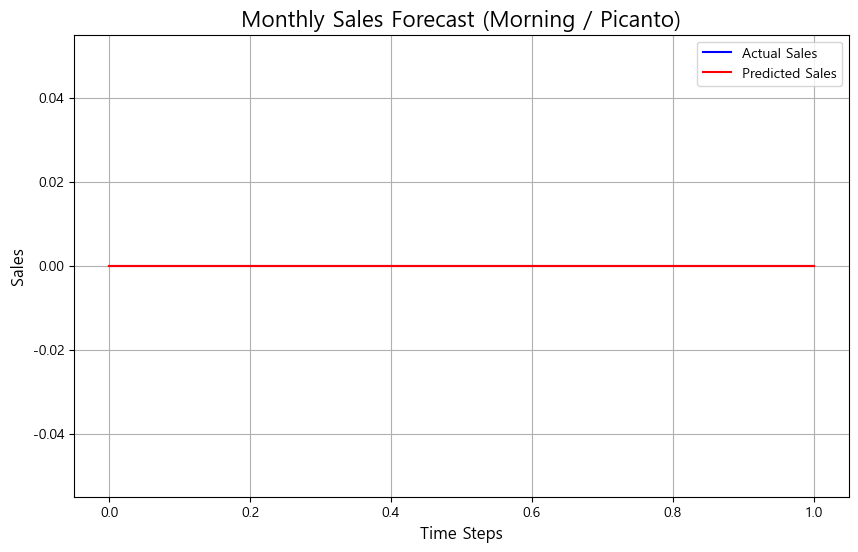

In [215]:
# 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_rescaled)), y_test_rescaled, label='Actual Sales', color='blue')
plt.plot(range(len(y_pred_rescaled)), y_pred_rescaled, label='Predicted Sales', color='red')
plt.title('Monthly Sales Forecast (Morning / Picanto)', fontsize=16)
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()